# Neuron

## Ausgangslage

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
x_inputs = np.logspace(-2, 1, 100)   # 50 values from 0.01 to 1 (log-spaced)
y_train_inputs = np.log10(x_inputs)

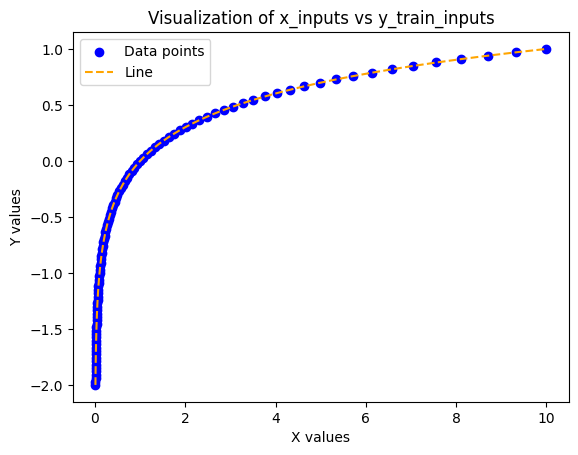

In [3]:
def visualize(x_inputs, y_train_inputs):
    # Scatter plot (points)
    plt.scatter(x_inputs, y_train_inputs, color="blue", label="Data points")

    # Line plot (connects points)
    plt.plot(x_inputs, y_train_inputs, color="orange", linestyle="--", label="Line")

    # Labels and title
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Visualization of x_inputs vs y_train_inputs")
    plt.legend()

    # Show the plot
    plt.show()

visualize(x_inputs, y_train_inputs)

## Bereitstellung des Modells

In [4]:
weight1 = random.uniform(-0.5, 0.5)
print(f"Random weight1: {weight1}")
bias1   = random.uniform(-0.5, 0.5)
print(f"Random bias2: {bias1}")
weight2 = random.uniform(-0.5, 0.5)
print(f"Random weigh2t: {weight2}")
bias2   = random.uniform(-0.5, 0.5)
print(f"Random bias2: {bias2}")

Random weight1: -0.18378787856608525
Random bias2: -0.270884287843593
Random weigh2t: -0.24435235329447502
Random bias2: -0.07401364775700536


In [19]:
epochs = 10000
print(f"Wir werden {epochs} Mal trainieren")
# print(list(range(epochs)))

Wir werden 10000 Mal trainieren


In [6]:
learning_rate = 0.01
print(f"wir trainieren mit einer learning rate von {learning_rate}")

wir trainieren mit einer learning rate von 0.01


In [20]:
package = zip(x_inputs, y_train_inputs)
# print(list(package))

## Start Training

In [21]:
for epoch in range(epochs):
    
    if epoch % 1000 == 0:
        print("\n")
        print(f"Ich trainiere in Epoche {epoch+1}")
    package = zip(x_inputs, y_train_inputs)
    
    for x, y_true in package:

        hidden = np.tanh(weight1 * x + bias1)
        y_pred = weight2 * hidden + bias2

        diff = y_pred - y_true

        # hidden layer gradients (chain rule)
        d_hidden = (1 - hidden**2) * weight2 * 2.0 * diff   # tanh' = 1 - tanh^2
        grad_w1 = d_hidden * x
        grad_b1 = d_hidden
        
        # output layer gradients
        grad_w2 = 2.0 * diff * hidden
        grad_b2 = 2.0 * diff
        

        # wir passen weight und bias an
        weight1 -= learning_rate * grad_w1
        bias1   -= learning_rate * grad_b1
        weight2 -= learning_rate * grad_w2
        bias2   -= learning_rate * grad_b2
        
        if epoch % 1000 == 0:
            print(f"Wir haben {x} und {y_true} als Trainings Daten")
            print(f"Ich sage y vorraus: {y_pred:.8f}")
            print(f"\033[31mIch lag um {diff:.8f} daneben\033[0m")
            print(f"neues weight1: {weight1:.8f} und neues bias1: {bias1:.8f}")
            print(f"neues weight2: {weight2:.8f} und neues bias2: {bias2:.8f}")

    



Ich trainiere in Epoche 1
Wir haben 0.01 und -2.0 als Trainings Daten
Ich sage y vorraus: -0.83193710
Ich lag um 1.16806290 daneben
neues weight1: -0.36293634 und neues bias1: -0.47455680
neues weight2: -3.21567095 und neues bias2: -2.43523405
Wir haben 0.010722672220103232 und -1.9696969696969697 als Trainings Daten
Ich sage y vorraus: -1.00425995
Ich lag um 0.96543702 daneben
neues weight1: -0.36240241 und neues bias1: -0.42476174
neues weight2: -3.20707856 und neues bias2: -2.45454279
Wir haben 0.011497569953977356 und -1.9393939393939394 als Trainings Daten
Ich sage y vorraus: -1.15751864
Ich lag um 0.78187530 daneben
neues weight1: -0.36192011 und neues bias1: -0.38281368
neues weight2: -3.20075435 und neues bias2: -2.47018030
Wir haben 0.012328467394420659 und -1.9090909090909092 als Trainings Daten
Ich sage y vorraus: -1.28907260
Ich lag um 0.62001831 daneben
neues weight1: -0.36149741 und neues bias1: -0.34852772
neues weight2: -3.19617850 und neues bias2: -2.48258067
Wir hab

# Usage

In [23]:
x_input = 3

hidden = np.tanh(weight1 * x_input + bias1)
y_model_pred = weight2 * hidden + bias2

print(f"x = {x_input}, y_pred = {y_model_pred:.8f}")
print(f"{x_input}, {y_model_pred}")

x = 3, y_pred = 0.57110938
3, 0.5711093810948786


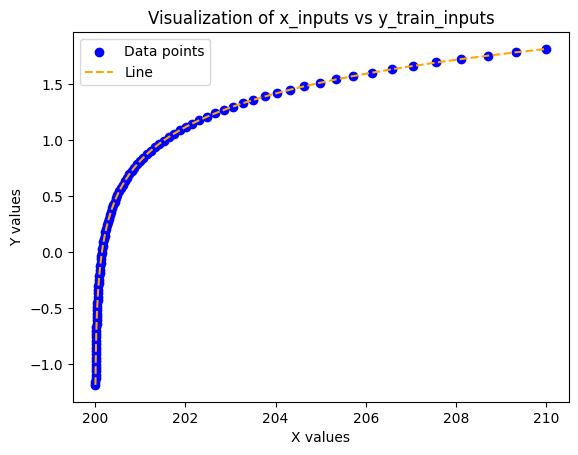

In [18]:
visualize(x_inputs + [x_input], y_train_inputs + [y_model_pred])

In [36]:
plt.plot(historical_loss, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Time")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'historical_loss' is not defined